In [ ]:
# Problem Set 1, due April 8th at 12:00pm 
(in other words, it is due at noon, or one minute after 11:59am).

### Before You Start
For this problem set, you should download INF0371-PS1.ipynb from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [19]:
#IPython is what you are using now to run the notebook
import IPython
print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__

# Module for plotting
import matplotlib
print "Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__

# Seaborn provides features to make matplotlib more attractive
import seaborn as sns
print "Seaborn version:      %6.6s" % sns.__version__

IPython version:       4.1.2 (need at least 1.0)
Numpy version:        1.10.4 (need at least 1.7.1)
SciPy version:        0.17.0 (need at least 0.12.0)
Pandas version:       0.17.1 (need at least 0.11.0)
Maplotlib version:     1.5.1 (need at least 1.2.1)
Scikit-Learn version:   0.17 (need at least 0.13.1)
Seaborn version:       0.7.0


### Working in a group?
List the names of other students with whom you worked on this problem set:
- *Person 1*
- *Person 2*
- ...

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [20]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [21]:
print bdata.keys()
print bdata.feature_names
print bdata.data.shape
print bdata.target.shape

# uncomment the following if you want to see a lengthy description of the dataset
print bdata.DESCR

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index 

In [22]:
boston = pd.DataFrame(bdata.data)
boston[14] = bdata.target
bdata.feature_names = np.append(bdata.feature_names, 'MEDV')

In [23]:
boston.columns = bdata.feature_names[:]
print boston.shape

(506, 14)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [24]:
# enter your code here

# 1,1,1
print boston.shape

# 1.1.2
print(pd.value_counts(boston['CHAS'].values, sort=False))

# 1.1.3
print boston.info()

# 1.1.4
print boston.sort_values('MEDV', ascending=False).head(5)['TAX']

(506, 14)
0    471
1     35
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 59.3 KB
None
283    198
225    307
369    666
370    666
371    666
Name: TAX, dtype: float64


*Provide our answers below:*

 - 1.1.1: 13 variables, 506 observations
 - 1.1.2: 35 neighborhoods exist where the tract bounds the Charles River
 - 1.1.3: not-null
 - 1.1.4: 198, 307, 666, 666, 666

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [25]:
# enter your code here

# 1.2.1
print boston.sort_values('MEDV', ascending=False).head(1)['MEDV']

# 1.2.2
print len(boston['RM'][boston['RM'] < 5])

# 1.2.3
print boston[boston['CHAS'] == 1].sort_values('MEDV', ascending=False).head(1)['TAX']

# 1.2.4
print boston.sort_values('MEDV', ascending=False).head(1)['CRIM']

# 1.2.5
print boston.sort_values('MEDV', ascending=True).head(1)['CRIM']

283    50
Name: MEDV, dtype: float64
15
372    666
Name: TAX, dtype: float64
283    0.01501
Name: CRIM, dtype: float64
398    38.3518
Name: CRIM, dtype: float64


*Provide our answers below:*

 - 1.2.1: $50,000
 - 1.2.2: 15 neighborhoods
 - 1.2.3: 666
 - 1.2.4: 0.01501
 - 1.2.5: 38.3518

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [26]:
# enter your code here
# print(boston)

bostonSummaryStatistics = pd.DataFrame()
bostonSummaryStatistics = pd.DataFrame(boston.columns.values)
bostonSummaryStatistics['name'] = (boston.columns.values)
bostonSummaryStatistics = bostonSummaryStatistics.drop(0, 1)
bostonSummaryStatistics = bostonSummaryStatistics.set_index(['name'])
bostonSummaryStatistics['occurences'] = boston.apply(lambda x: len(x))
bostonSummaryStatistics['mean'] = boston.apply(lambda x: x.mean())
bostonSummaryStatistics['stdev'] = boston.apply(lambda x: x.std())
bostonSummaryStatistics['min'] = boston.apply(lambda x: x.min())
bostonSummaryStatistics['median'] = boston.apply(lambda x: x.median())
bostonSummaryStatistics['max'] = boston.apply(lambda x: x.max())


print(bostonSummaryStatistics)

         occurences        mean       stdev        min     median       max
name                                                                       
CRIM            506    3.593761    8.596783    0.00632    0.25651   88.9762
ZN              506   11.363636   23.322453    0.00000    0.00000  100.0000
INDUS           506   11.136779    6.860353    0.46000    9.69000   27.7400
CHAS            506    0.069170    0.253994    0.00000    0.00000    1.0000
NOX             506    0.554695    0.115878    0.38500    0.53800    0.8710
RM              506    6.284634    0.702617    3.56100    6.20850    8.7800
AGE             506   68.574901   28.148861    2.90000   77.50000  100.0000
DIS             506    3.795043    2.105710    1.12960    3.20745   12.1265
RAD             506    9.549407    8.707259    1.00000    5.00000   24.0000
TAX             506  408.237154  168.537116  187.00000  330.00000  711.0000
PTRATIO         506   18.455534    2.164946   12.60000   19.05000   22.0000
B           

### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [27]:
# enter your code here

homesAdj = boston[boston['CHAS'] == 1]
homesNotAdj = boston[boston['CHAS'] == 0]
t, p = sp.stats.ttest_ind(homesAdj['MEDV'], homesNotAdj['MEDV'])
print(t, p)

(3.9964374660905091, 7.3906231705199048e-05)


Performing a t-test using the median house values in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River gives a t value of ~ 4 and a p value of 7.4 * 10^-5.
We reject the null hypothesis in favor of the alternative hypothesis as the p value is so low.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


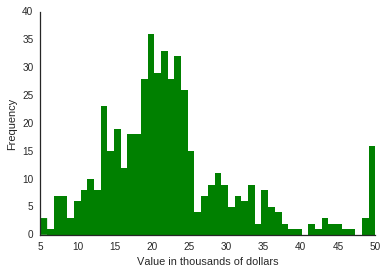

In [28]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  
# edit the code below to make the graph look good
housePriceHist = plt.hist(bdata.target, bins=50, color='green', linewidth=0)
plt.xlabel("Value in thousands of dollars")
plt.ylabel("Frequency")
cur_axes = plt.gca()

# Hide the right and top spines
cur_axes.spines['right'].set_visible(False)
cur_axes.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
cur_axes.yaxis.set_ticks_position('left')
cur_axes.xaxis.set_ticks_position('bottom')

plt.show()

### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


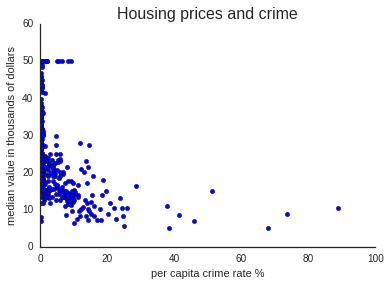

In [29]:
# enter your code here

plt.scatter(boston['CRIM'], boston['MEDV'])
plt.xlabel("per capita crime rate %")
plt.ylabel("median value in thousands of dollars")
plt.title('Housing prices and crime', fontsize=16)

axes = plt.gca()

# Set axes limits
axes.set_xlim([0, 100])
axes.set_ylim([0,60])

# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
axes.yaxis.set_ticks_position('left')
axes.xaxis.set_ticks_position('bottom')

plt.show()

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

In [34]:
print(np.corrcoef(boston.CRIM, bdata.target))


[[ 1.         -0.38583169]
 [-0.38583169  1.        ]]


*Write your thoughts here (1-2 paragraphs).*

From observing the scatterplot, there does seem to be a weak correlation relationship between crime rates and housing prices in Boston. The calculated correlation coefficient is -.39, which means as the per capita crime rate % gets higher, the median value in thousands of dollars gets lower. The sample size is fairly low for the neighborhoods with a high crime %, but there does seem to be some relationship, as evidenced by the correlation coefficient.

I think this relationship is causal. There are many factors that people look into when buying a home, and these all impact the pricing of homes and neighborhoods. Safety is one very important concern. I personally, if all other variables were equal, would be willing to pay more for a neighborhood that is safer than for one which has a lot of crime. It makes sense to me that a high rate of crime would drive a neighborhood value down.

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear green (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

Axes(0.125,0.125;0.62x0.775)


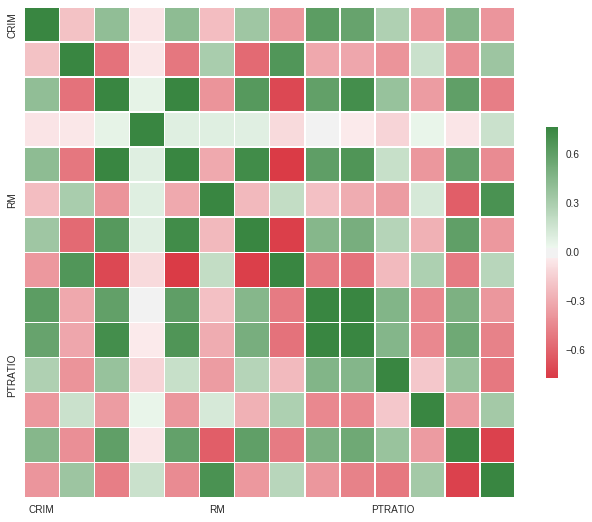

In [31]:
# enter your code here

sns.set(style="white")

# Compute the correlation matrix
corr = boston.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 130, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
print(sns.heatmap(corr, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax))

*Write your response here.*
The variables that appear to be the most positively correlated are NOX and INDUS.
The variables that appear to be the msot negatively correlated are NOX and DIS

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ebb26c8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6eada2a7d0>]], dtype=object)

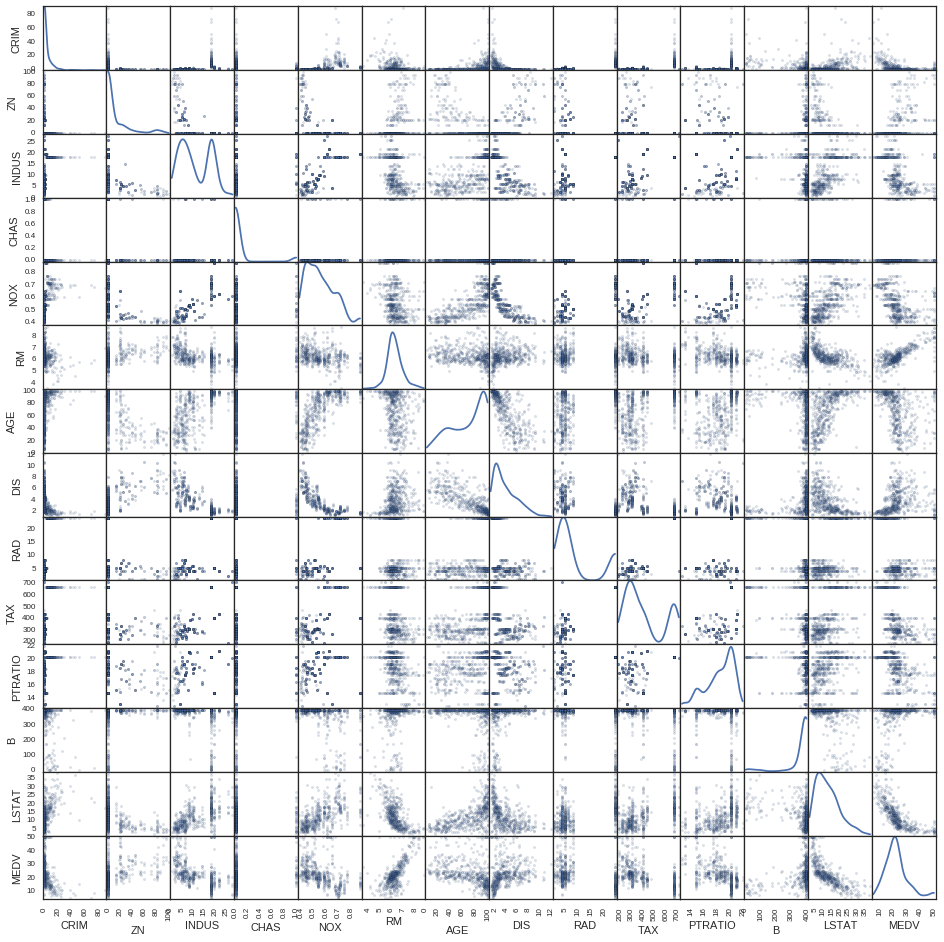

In [32]:
# enter your code here
pd.scatter_matrix(boston, alpha=0.2, figsize=(16, 16), diagonal='kde')